
# Object Recognition

The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

# Import dependancies

In [293]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset

In [388]:
df = pd.read_csv("D://Great learning//Datasets//vehicle-2.csv")

# Exploratory Data Analysis

In [295]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [296]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

We have only numerical columns in this dataset

In [298]:
df.shape

(846, 19)

In [299]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

we have missing vaues in almost columns

<h1>Univariate Analysis</h1>

<h2>Analysing numerical attributes</h2>

In [300]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

We can remove the missing value records as it contributes to very less percent of the data. 
But lets Replace it here.

In [389]:
df=df.fillna(method='ffill')

In [302]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

<h2>Checking outliers and imputing them with median</h2>

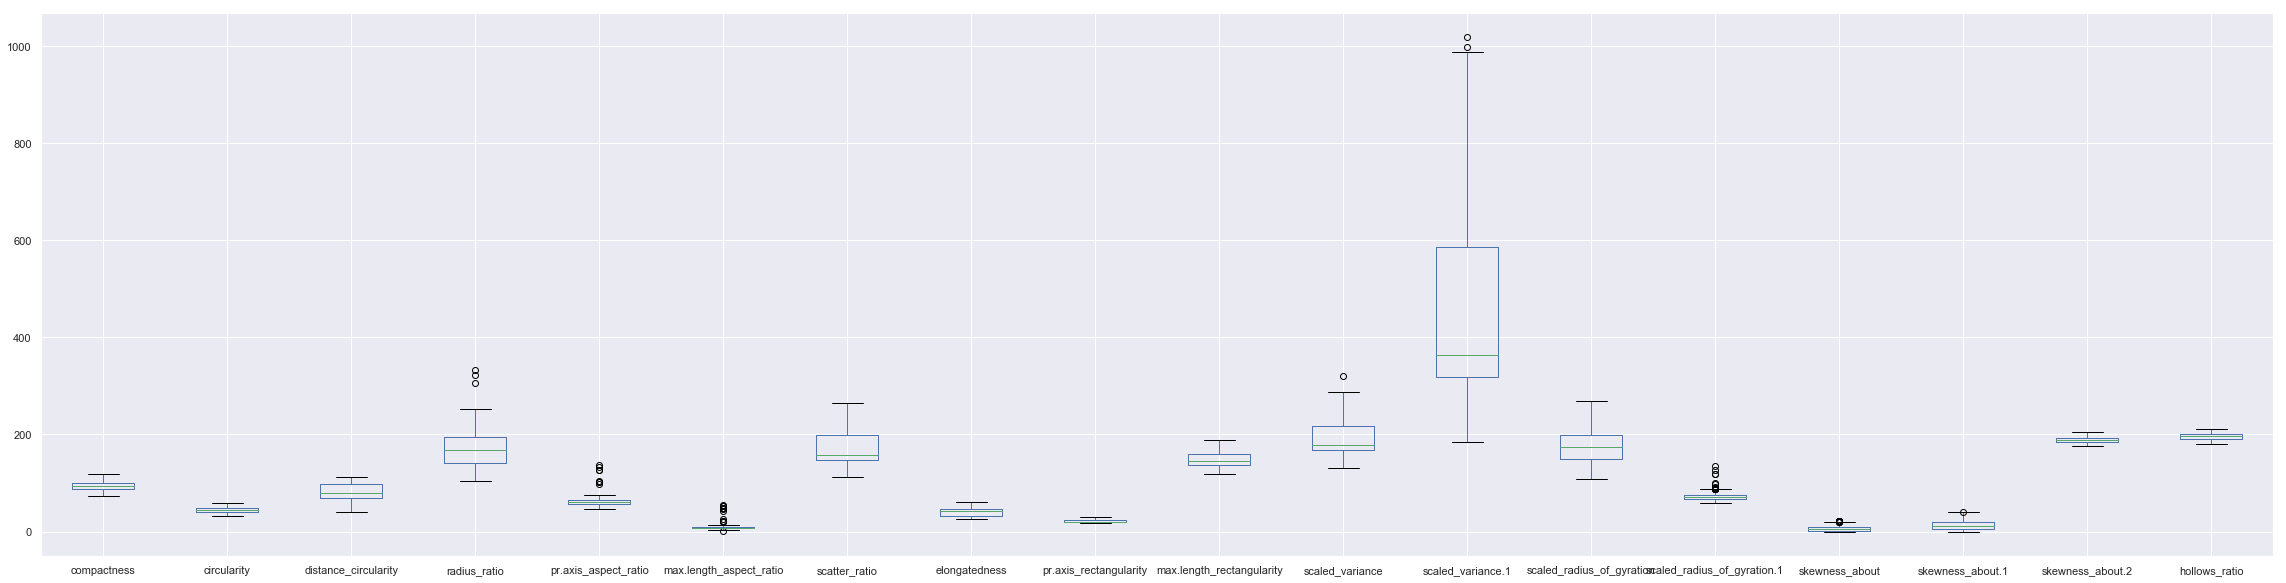

In [393]:
df.boxplot(figsize=(40,10))

Anything beyond 1.5 IQR is suspected outliers. Any values beyond 2 or 3 IQR is real outliers. We see some outliers in 8 columns

In [405]:
def outlierdetection(num,attribute):
    sorted_attribute = sorted(attribute)
    q1 = np.percentile(sorted_attribute,25)
    q3= np.percentile(sorted_attribute,75)
    IQR = q3 - q1
    minimum = q1 -(num * IQR) 
    maximum = q3 +(num * IQR)
    outliers=[]
    for y in sorted_attribute: 
        if y < minimum or y > maximum:
            outliers.append(y)
    return outliers

In [406]:
radius_ratio_outliers = outlierdetection(2,df.radius_ratio)
praxis_aspect_ratio_outliers = outlierdetection(3,df['pr.axis_aspect_ratio'])
maxlength_aspect_ratio_outliers = outlierdetection(2,df['max.length_aspect_ratio'])
scaled_variance_outliers = outlierdetection(2,df.scaled_variance)
scaled_variance1_outliers = outlierdetection(1.5,df['scaled_variance.1'])
scaled_radius_of_gyration1_outliers = outlierdetection(2,df['scaled_radius_of_gyration.1'])
skewness_about_outliers = outlierdetection(1.5,df['skewness_about'])
skewness_about1_outliers = outlierdetection(1.5,df['skewness_about.1'])

In [407]:
for item in radius_ratio_outliers:
    median = df['radius_ratio'].median()
    df["radius_ratio"] = df["radius_ratio"].mask(df["radius_ratio"] == item, median)
for item in praxis_aspect_ratio_outliers:
    median = df['pr.axis_aspect_ratio'].median()
    df['pr.axis_aspect_ratio'] = df['pr.axis_aspect_ratio'].mask(df['pr.axis_aspect_ratio'] == item, median)  
for item in maxlength_aspect_ratio_outliers:
    median = df['max.length_aspect_ratio'].median()
    df["max.length_aspect_ratio"] = df["max.length_aspect_ratio"].mask(df["max.length_aspect_ratio"] == item, median)  
for item in scaled_variance_outliers:
    median = df['scaled_variance'].median()
    df["scaled_variance"] = df["scaled_variance"].mask(df["scaled_variance"] == item, median)  
for item in scaled_variance1_outliers:
    median = df['scaled_variance.1'].median()
    df['scaled_variance.1'] = df['scaled_variance.1'].mask(df['scaled_variance.1'] == item, median)
for item in scaled_radius_of_gyration1_outliers:
    median = df['scaled_radius_of_gyration.1'].median()
    df['scaled_radius_of_gyration.1'] = df['scaled_radius_of_gyration.1'].mask(df['scaled_radius_of_gyration.1'] == item, median)    
for item in skewness_about_outliers:
    median = df['skewness_about'].median()
    df['skewness_about'] = df['skewness_about'].mask(df['skewness_about'] == item, median)    
for item in skewness_about1_outliers:
    median = df['skewness_about.1'].median()
    df['skewness_about.1'] = df['skewness_about.1'].mask(df['skewness_about.1'] == item, median)    

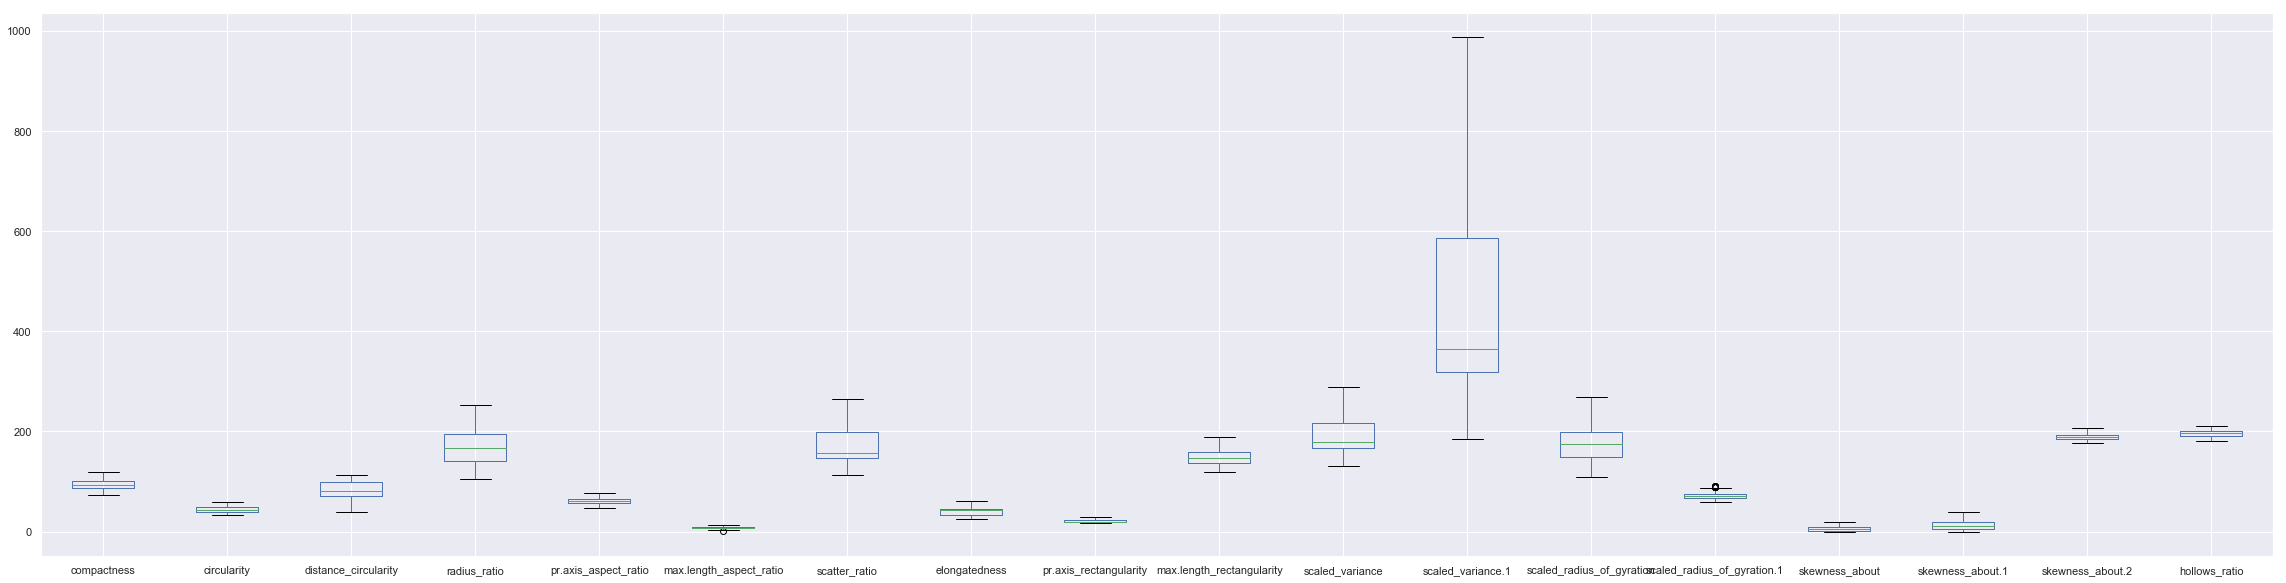

In [408]:
df.boxplot(figsize=(40,10))

<h2>Bivariate analysis</h2>

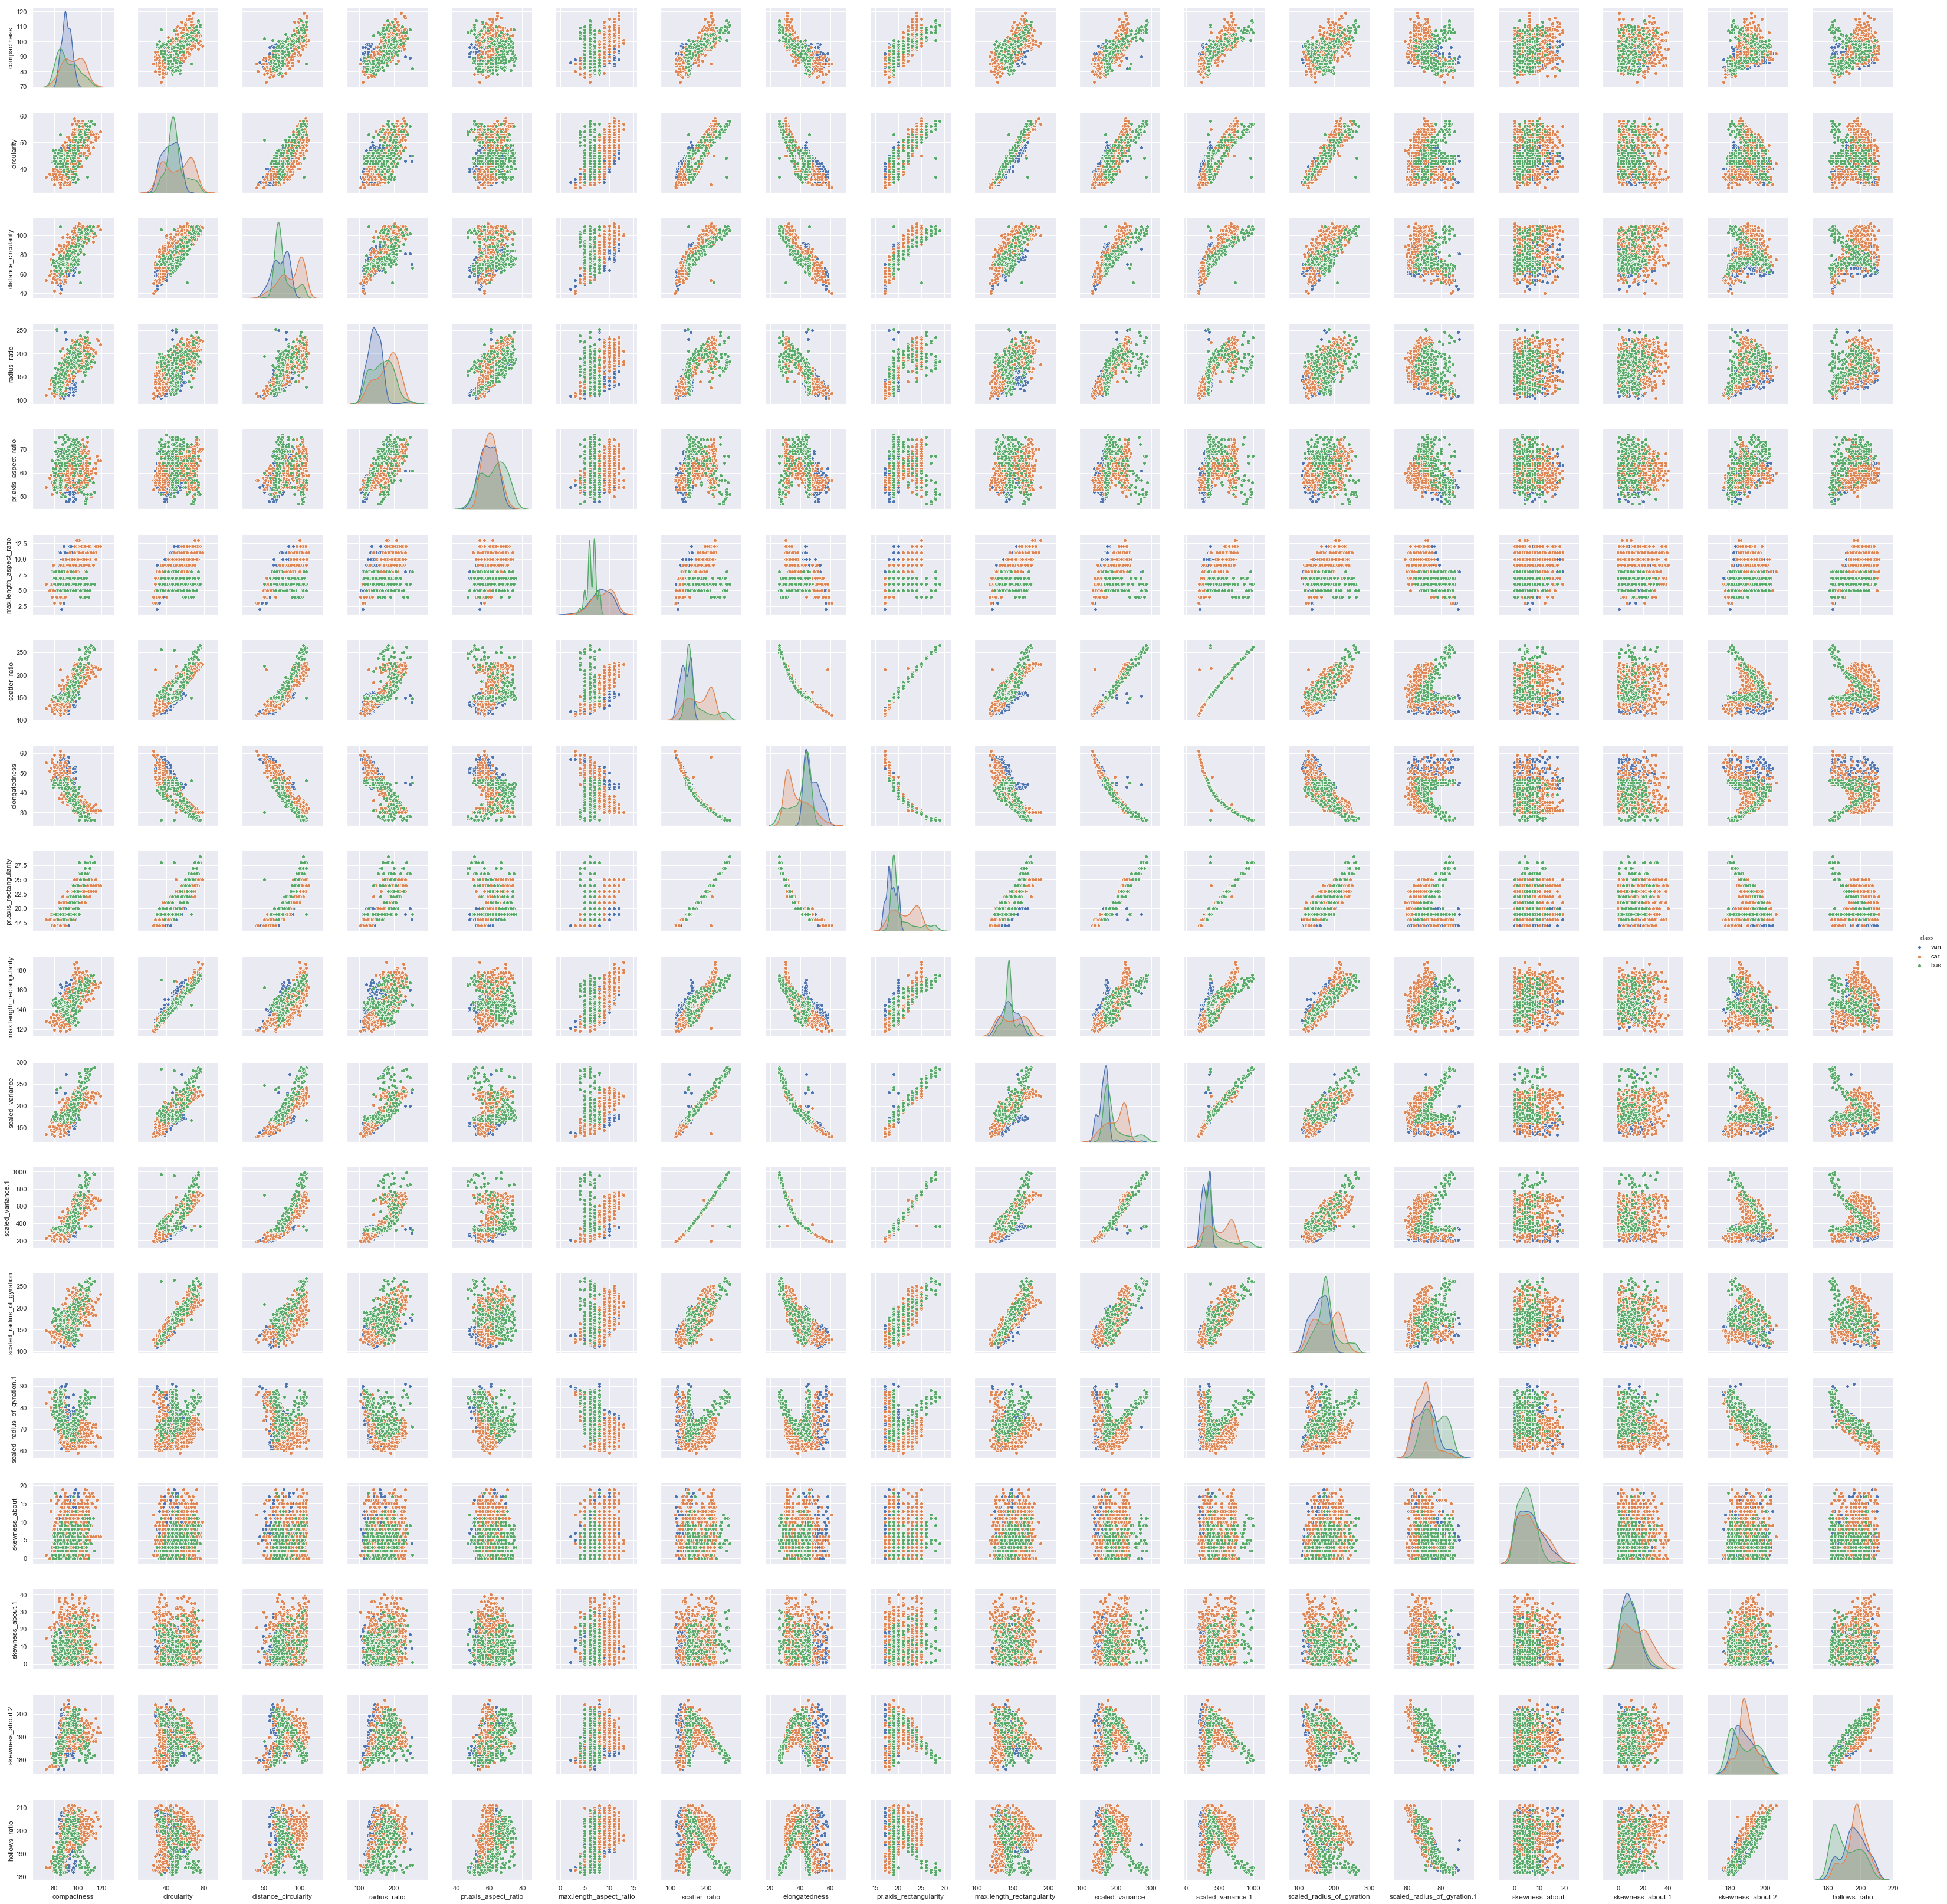

In [572]:
sns.pairplot(df, hue='class', diag_kind='kde')

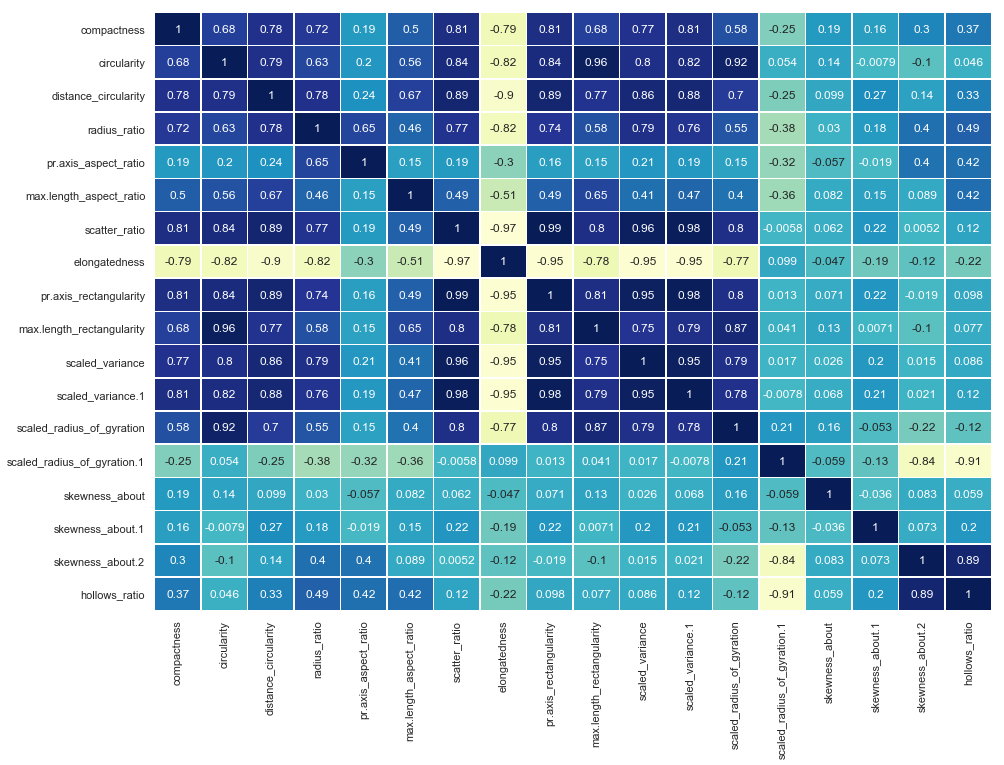

In [410]:
plt.figure(figsize=(15,11))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

many variables have a strong positive correlation and negative correlation

<h1>PCA</h1>

Lets split the data in to x and y where independant variables and dependant variable are are separated.

In [411]:
x = df[df.columns[1:-1]]
y = df["class"]

Now standardize the independent variables dataframe. we can either use the standard scalar function or zscore

In [412]:
from scipy.stats import zscore
x_std = x.apply(zscore)

find the covariance matrix

In [413]:
cov_matrix = np.cov(x_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.78710873  0.6341418   0.20276987  0.56453191  0.83871323
  -0.8176496   0.83924021  0.95821308  0.79656989  0.82323954  0.92156848
   0.05387615  0.1353205  -0.00792077 -0.10428641  0.04601561]
 [ 0.78710873  1.00118343  0.78571004  0.24251603  0.67204941  0.89339966
  -0.90363347  0.88609702  0.76969737  0.8632355   0.87788205  0.70134094
  -0.24669237  0.09934577  0.26554968  0.14360582  0.33156201]
 [ 0.6341418   0.78571004  1.00118343  0.64706758  0.46534196  0.76717359
  -0.82433389  0.7442828   0.57848315  0.78821985  0.76240051  0.55240153
  -0.38017897  0.0299078   0.18266944  0.40299844  0.48765479]
 [ 0.20276987  0.24251603  0.64706758  1.00118343  0.15506141  0.19250671
  -0.29716578  0.16120941  0.14696613  0.20713932  0.19503671  0.14762608
  -0.32193831 -0.05715803 -0.01861599  0.40033094  0.4156829 ]
 [ 0.56453191  0.67204941  0.46534196  0.15506141  1.00118343  0.49150813
  -0.50940418  0.4912026   0.64653221  0.40691962  0.4674888

obtain the eigen values and eigen vectors

In [414]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.99540548e-01 -1.20570223e-01  2.11510801e-01  6.04062307e-03
   1.25641122e-01  6.69866352e-02 -4.01283076e-01  3.50843045e-02
  -1.59595553e-01  9.10254602e-02 -2.37568199e-01 -4.95151893e-02
   6.56864240e-02 -4.10924140e-01 -2.99565023e-01 -5.57185867e-01
  -4.91694021e-02]
 [-3.12037521e-01  5.78858583e-02 -6.23273962e-02 -1.29287151e-01
   6.28375138e-02 -7.73323646e-03  2.19389909e-01  3.44293573e-01
  -2.36302259e-02 -6.41723327e-01 -4.97414903e-01  1.67274694e-02
  -1.57350483e-01  1.17204823e-01 -7.08098997e-02  5.58739668e-02
  -3.60955873e-02]
 [-2.78491351e-01  2.04165960e-01 -4.72801130e-02  2.53626443e-01
  -1.47098465e-01  1.21364288e-01  1.73101866e-01  1.51708785e-01
   3.60012093e-01  5.23329809e-01 -2.88083661e-01 -6.29937692e-05
  -2.86584161e-01 -1.97400599e-01 -1.95665556e-01  2.80462446e-01
  -1.82570319e-02]
 [-1.02682968e-01  2.66358553e-01  9.47116110e-02  5.88571196e-01
  -1.46392266e-01  6.17107684e-01  3.59865124e-02 -6.50692330e-02
 

Sort the eigen values in descending order and combine eigen values and vectors

In [415]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort(reverse=True)

eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[9.032708244601896, 3.3196524200349278, 1.18580451344642, 1.121992531050182, 0.8720890587365348, 0.6338391460584805, 0.31122472540899443, 0.14036800717967826, 0.08321944287599918, 0.08026917767103456, 0.06909699821731956, 0.04692718634594305, 0.03524449062998908, 0.03252229696032, 0.0236067119480204, 0.021391695362952826, 0.010161696666573053]


In [465]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in eigvalues_sorted]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [50.12239603 68.54310981 75.12312566 81.34904954 86.18826188 89.70542814
 91.43241063 92.21131111 92.67309486 93.11850762 93.50192608 93.76232451
 93.95789579 94.13836165 94.26935503 94.3880573  94.44444444]


Derive Array of variance

In [466]:
tot = sum(eigenvalues)
var_explained = [(i / tot)*100 for i in eigvalues_sorted]  

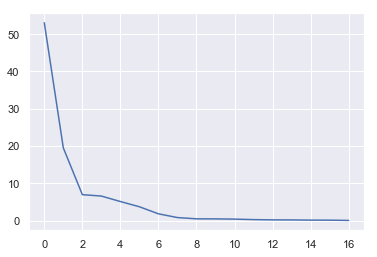

In [467]:
plt.plot(var_explained)

Derive Array of cumulative variance

In [468]:
cumulative_variance_explained = np.cumsum(var_explained)

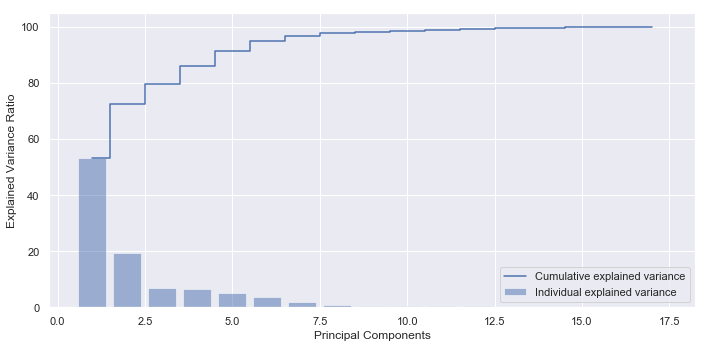

In [469]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigenvalues.size + 1), var_explained, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cumulative_variance_explained, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

We could see that after 8th eigen vector, there is no much contribution. Hence I'm going to reduce my dataset from 17 dimensions to 8 dimensions.

In [657]:
P_reduce = np.array(eigvectors_sorted[0:8])

Now Map our original dataset to 8 dimensions

In [658]:
x_std_8D = np.dot(x_std,P_reduce.T)

Now, lets convert the resultant array in to a Dataframe for further usage

In [659]:
df_8D = pd.DataFrame(x_std_8D)

In [660]:
df_8D.head()

0         1         2         3         4         5         6  \
0 -0.567038  0.707597  0.518390  0.606631  0.633160  2.038456 -0.379759   
1  1.485250  0.345346  0.278549 -1.301506  0.240374  0.074579  0.231075   
2 -3.704355 -0.209161  1.240573 -0.154794 -0.999130  0.605378  0.807464   
3  1.603111  3.000581  0.462539 -0.352723  0.610498 -0.298221  0.098657   
4  0.343062 -1.373079  0.292973  0.415438 -0.617799  0.752939  0.700934   

          7  
0  0.049456  
1 -0.073111  
2  0.333346  
3 -0.437357  
4  1.520585

<h2>Using scikit learn to achieve the same results</h2>

We have our data splitted into independent and target, x_std & y

In [661]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
data_reduced = pca.fit_transform(x_std)
df_8D = pd.DataFrame(data_reduced)

In [662]:
df_8D.head()

0         1         2         3         4         5         6  \
0  0.567038 -0.707597 -0.518390  0.606631 -0.633160 -2.038456 -0.379759   
1 -1.485250 -0.345346 -0.278549 -1.301506 -0.240374 -0.074579  0.231075   
2  3.704355  0.209161 -1.240573 -0.154794  0.999130 -0.605378  0.807464   
3 -1.603111 -3.000581 -0.462539 -0.352723 -0.610498  0.298221  0.098657   
4 -0.343062  1.373079 -0.292973  0.415438  0.617799 -0.752939  0.700934   

          7  
0  0.049456  
1 -0.073111  
2  0.333346  
3 -0.437357  
4  1.520585

<h2>Lets build the model using SVM</h2>

In [663]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

<h3>SVM model without PCA</h3>

In [664]:
X_train, X_test, y_train, y_test = train_test_split(x_std,y, stratify = y, test_size = 0.3, random_state = 0)

In [665]:
X_train.shape

(592, 17)

In [666]:
y_train.shape

(592,)

In [667]:
X_test.shape

(254, 17)

In [668]:
y_test.shape

(254,)

In [669]:
svm = SVC(probability = True)

In [670]:
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [671]:
svm.score(X_train,y_train)

0.9763513513513513

In [672]:
svm.score(X_test,y_test)

0.9803149606299213

In [673]:
y_pred = svm.predict(X_test)

In [674]:
confusion_matrix(y_test,y_pred)

array([[ 63,   2,   0],
       [  1, 128,   0],
       [  1,   1,  58]], dtype=int64)

In [675]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bus       0.97      0.97      0.97        65
         car       0.98      0.99      0.98       129
         van       1.00      0.97      0.98        60

   micro avg       0.98      0.98      0.98       254
   macro avg       0.98      0.98      0.98       254
weighted avg       0.98      0.98      0.98       254



<h3>SVM model with PCA</h3>

In [676]:
X_train, X_test, y_train, y_test = train_test_split(df_8D,y, stratify = y, test_size = 0.3, random_state = 0)

In [677]:
X_train.shape

(592, 8)

In [678]:
y_train.shape

(592,)

In [679]:
X_test.shape

(254, 8)

In [680]:
y_test.shape

(254,)

In [681]:
svm = SVC(probability = True)

In [682]:
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [683]:
svm.score(X_train,y_train)

0.9695945945945946

In [684]:
svm.score(X_test,y_test)

0.9566929133858267

In [685]:
y_pred = svm.predict(X_test)

In [686]:
confusion_matrix(y_test,y_pred)

array([[ 63,   2,   0],
       [  0, 127,   2],
       [  2,   5,  53]], dtype=int64)

In [687]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bus       0.97      0.97      0.97        65
         car       0.95      0.98      0.97       129
         van       0.96      0.88      0.92        60

   micro avg       0.96      0.96      0.96       254
   macro avg       0.96      0.95      0.95       254
weighted avg       0.96      0.96      0.96       254



<h3>Observations</h3>

Many of the variables seems to be correlated amongst each other.
In order to reduce the number of dimensions, upon checking the variation explained by each of these variables, it was found that 8 components(at the max) explain all of the variations.
The model built without using PCA has a better accuracy score than the one built with wing PCA